1) Using titanic dataset. Do the pre-processing of the dataset if required and 
create a ensemble models using any of the 2 ensemble bagging methods like 
random forest , logistic regression, etc. Evaluate and visualize the result. (Easy 
level

In [266]:
import pandas as pd 
import numpy as np
 
import matplotlib.pyplot as plt
import seaborn as sns

In [267]:
df=pd.read_csv("titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
151,152,1,1,"Pears, Mrs. Thomas (Edith Wearne)",female,22.0,1,0,113776,66.6000,C2,S
152,153,0,3,"Meo, Mr. Alfonzo",male,55.5,0,0,A.5. 11206,8.0500,NaN,S
153,154,0,3,"van Billiard, Mr. Austin Blyler",male,40.5,0,2,A/5. 851,14.5000,NaN,S
154,155,0,3,"Olsen, Mr. Ole Martin",male,NaN,0,0,Fa 265302,7.3125,NaN,S


In [268]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [269]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,156.000000,156.000000,156.000000,126.000000,156.000000,156.000000,156.000000
mean,78.500000,0.346154,2.423077,28.141508,0.615385,0.397436,28.109587
std,45.177428,0.477275,0.795459,14.613880,1.056235,0.870146,39.401047
min,1.000000,0.000000,1.000000,0.830000,0.000000,0.000000,6.750000
25%,39.750000,0.000000,2.000000,19.000000,0.000000,0.000000,8.003150
50%,78.500000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,117.250000,1.000000,3.000000,35.000000,1.000000,0.000000,30.371850
max,156.000000,1.000000,3.000000,71.000000,5.000000,5.000000,263.000000


In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  156 non-null    int64  
 1   Survived     156 non-null    int64  
 2   Pclass       156 non-null    int64  
 3   Name         156 non-null    object 
 4   Sex          156 non-null    object 
 5   Age          126 non-null    float64
 6   SibSp        156 non-null    int64  
 7   Parch        156 non-null    int64  
 8   Ticket       156 non-null    object 
 9   Fare         156 non-null    float64
 10  Cabin        31 non-null     object 
 11  Embarked     155 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 14.8+ KB


In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  156 non-null    int64  
 1   Survived     156 non-null    int64  
 2   Pclass       156 non-null    int64  
 3   Name         156 non-null    object 
 4   Sex          156 non-null    object 
 5   Age          126 non-null    float64
 6   SibSp        156 non-null    int64  
 7   Parch        156 non-null    int64  
 8   Ticket       156 non-null    object 
 9   Fare         156 non-null    float64
 10  Cabin        31 non-null     object 
 11  Embarked     155 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 14.8+ KB


In [272]:
#cleaning data set
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             30
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          125
Embarked         1
dtype: int64

In [273]:
df=df.drop(['Cabin',"Name"],axis=1)
df.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C


In [274]:
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Ticket'] = le.fit_transform(df["Ticket"])
df['Embarked'] = le.fit_transform(df['Embarked'])
df['Age'] = le.fit_transform(df['Age'])
df['Fare'] = le.fit_transform(df['Fare'])

df.head()        #'Cabin',"Name"

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,1,19,1,0,103,6,2
1,2,1,1,0,37,1,0,124,82,0
2,3,1,3,0,23,0,0,142,17,2
3,4,1,1,0,34,1,0,8,75,2
4,5,0,3,1,34,0,0,92,19,2


C:\Users\DELL\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


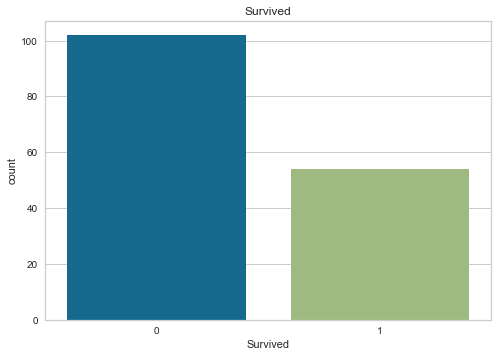

In [275]:
#plot single column by count its value by using count plot
plt.title("Survived")
sns.countplot(df["Survived"])
plt.show()                                                 

In [276]:
x=df[[ "PassengerId","Pclass","Sex","Age","SibSp","Parch","Ticket","Fare","Embarked"]]
y=df["Survived"]                             

In [277]:
#spliting
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.05, random_state =42)

In [278]:
from sklearn.ensemble import RandomForestClassifier


In [279]:
clf=RandomForestClassifier()

clf.fit(x_train,y_train)

RandomForestClassifier()

In [280]:
from sklearn.metrics import accuracy_score
precdiction_train=clf.predict(x_train)
accuracy_score(y_train,precdiction_train)


1.0

In [281]:
precdiction_test=clf.predict(x_test)
accuracy_score(y_test,precdiction_test)

1.0

In [282]:
from sklearn.linear_model import LogisticRegression

In [283]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.05, random_state =42)

In [284]:
lg=LogisticRegression()
lg.fit(x_train,y_train)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [285]:
precdiction_train=lg.predict(x_train)
accuracy_score(y_train,precdiction_train)


0.831081081081081

In [286]:
precdiction_test=lg.predict(x_test)
accuracy_score(y_test,precdiction_test)

0.875

In [287]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier

In [288]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.05, random_state =42)

In [289]:
ag=AdaBoostClassifier()
ag.fit(x_train,y_train)

AdaBoostClassifier()

In [290]:
precdiction_train=ag.predict(x_train)
accuracy_score(y_train,precdiction_train)

0.9324324324324325

In [291]:
precdiction_test=ag.predict(x_test)
accuracy_score(y_test,precdiction_test)

0.875

In [292]:
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)

y_pred = gb.predict(x_test)
y_pred_prob = gb.predict_proba(x_test)

In [293]:
precdiction_train=gb.predict(x_train)
accuracy_score(y_train,precdiction_train)

1.0

In [294]:
precdiction_test=gb.predict(x_test)
accuracy_score(y_test,precdiction_test)

1.0

In [295]:
bz=BaggingClassifier()
bz.fit(x_train,y_train)

y_pred = gb.predict(x_test)
y_pred_prob = gb.predict_proba(x_test)

In [296]:
precdiction_train=bz.predict(x_train)
accuracy_score(y_train,precdiction_train)

0.9797297297297297

In [297]:
precdiction_train=bz.predict(x_test)
accuracy_score(y_test,precdiction_test)

1.0

In [298]:
from  xgboost import XGBClassifier
xgb= XGBClassifier()
xgb.fit(x_train,y_train)

y_pred = xgb.predict(x_test)
y_pred_prob = xgb.predict_proba(x_test)

In [299]:
precdiction_train=xgb.predict(x_train)
accuracy_score(y_train,precdiction_train)

1.0

In [300]:
precdiction_train=bz.predict(x_test)
accuracy_score(y_test,precdiction_test)

1.0

In [306]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.classifier import ClassPredictionError
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.05, random_state =42)

In [307]:
clf=RandomForestClassifier()

clf.fit(x_train,y_train)

RandomForestClassifier()

In [308]:
# Create classification dataset
x, y = make_classification(
    n_samples=1000, n_classes=5, n_informative=3, n_clusters_per_class=1,
    random_state=36,
)

#classes = ["PassengerId","Pclass","Sex","Age"]

visualizer = ClassPredictionError( RandomForestClassifier(random_state=42, n_estimators=10)
   



# Fit the training data to the visualizer
visualizer.fit(x_train, y_train)

# Evaluate the model on the test data
visualizer.score(x_test, y_test)

# Draw visualization
visualizer.show()

SyntaxError: invalid syntax (Temp/ipykernel_17284/1044613297.py, line 15)

In [319]:
from sklearn.linear_model import LogisticRegression

from yellowbrick.classifier import DiscriminationThreshol




# Instantiate the classification model and visualizer
model = LogisticRegression(multi_class="auto", solver="liblinear")
visualizer = DiscriminationThreshold(model)

visualizer.fit(x, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

ImportError: cannot import name 'DiscriminationThreshol' from 'yellowbrick.classifier' (C:\Users\DELL\Anaconda3\lib\site-packages\yellowbrick\classifier\__init__.py)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


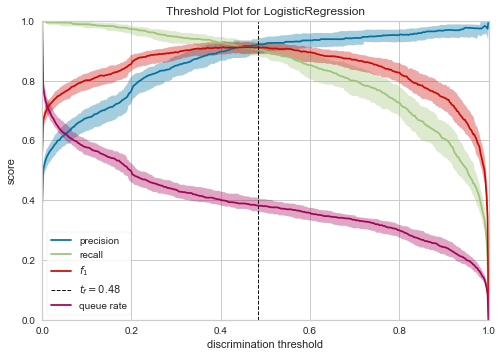

<AxesSubplot:title={'center':'Threshold Plot for LogisticRegression'}, xlabel='discrimination threshold', ylabel='score'>

In [318]:
from sklearn.linear_model import LogisticRegression

from yellowbrick.classifier import DiscriminationThreshold


# Load a binary classification dataset


# Instantiate the classification model and visualizer
model = LogisticRegression(multi_class="auto", solver="liblinear")
visualizer = DiscriminationThreshold(model)

visualizer.fit(x, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

In [ ]:
from k